In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Welcome\Desktop\exceL\bmi.csv",index_col=0,encoding='ISO-8859-1')

In [3]:
data.head()

,Gender,Height,Weight,Index
Serial No,,,,
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
data.tail()

,Gender,Height,Weight,Index
Serial No,,,,
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [5]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [7]:
data.head()

,Gender,Height,Weight,Index
Serial No,,,,
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [8]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [9]:
data.head()

,Gender,Height,Weight,Index
Serial No,,,,
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [10]:
bins=(-1,0,1,2,3,4,5)
health=['malnourished','underweight','fit','slightly_overweight','overweight','extremely_overweight']
data['Index']=pd.cut(data['Index'],bins = bins , labels =health)

In [11]:
data

,Gender,Height,Weight,Index
Serial No,,,,
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly_overweight
4,1,149,61,slightly_overweight
...,...,...,...,...
495,0,150,153,extremely_overweight
496,0,184,121,overweight
497,0,141,136,extremely_overweight


In [12]:
data['Index']

Serial No
0                overweight
1                       fit
2                overweight
3       slightly_overweight
4       slightly_overweight
               ...         
495    extremely_overweight
496              overweight
497    extremely_overweight
498    extremely_overweight
499    extremely_overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): [malnourished < underweight < fit < slightly_overweight < overweight < extremely_overweight]

In [13]:
data['Index'].value_counts()

extremely_overweight    198
overweight              130
fit                      69
slightly_overweight      68
underweight              22
malnourished             13
Name: Index, dtype: int64

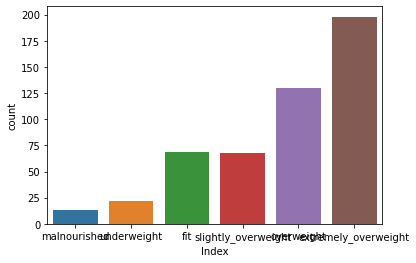

In [14]:
sns.countplot(data['Index'])

In [15]:
data.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

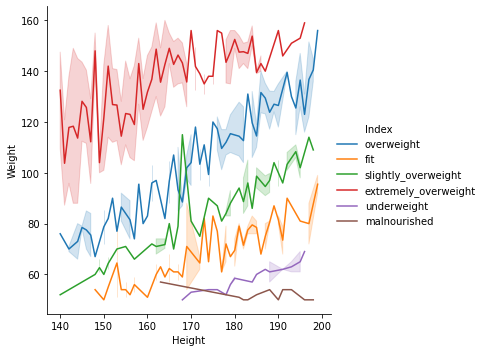

In [16]:
sns.relplot(x='Height',y='Weight',hue='Index' ,kind ='line' , data=data)

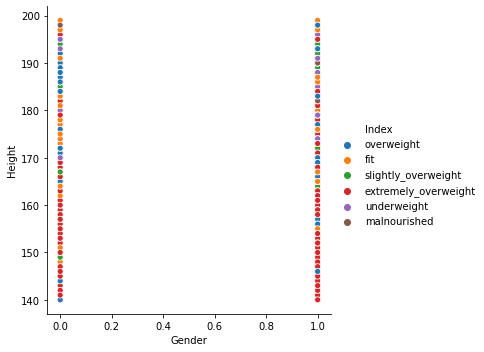

In [20]:
sns.relplot(x='Gender',y='Height',hue='Index' ,data=data,height =5,aspect=1)

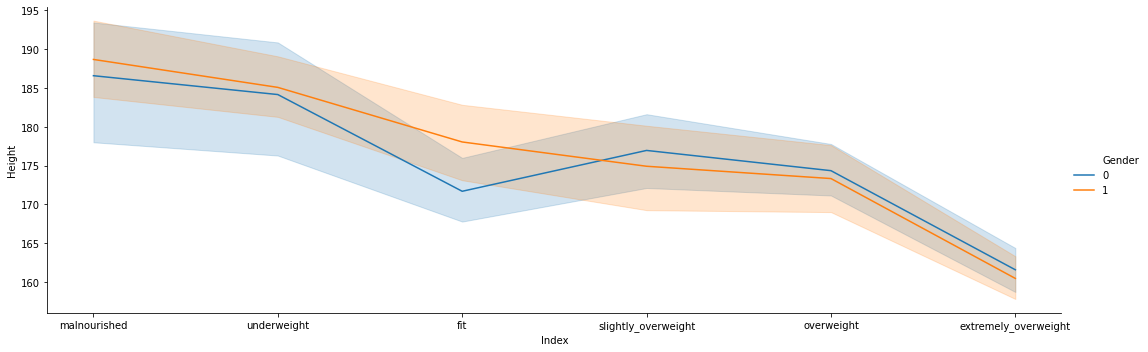

In [21]:
sns.relplot(x='Index',y='Height',hue='Gender' ,kind ='line' , data=data, height=5,aspect=3)

In [30]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

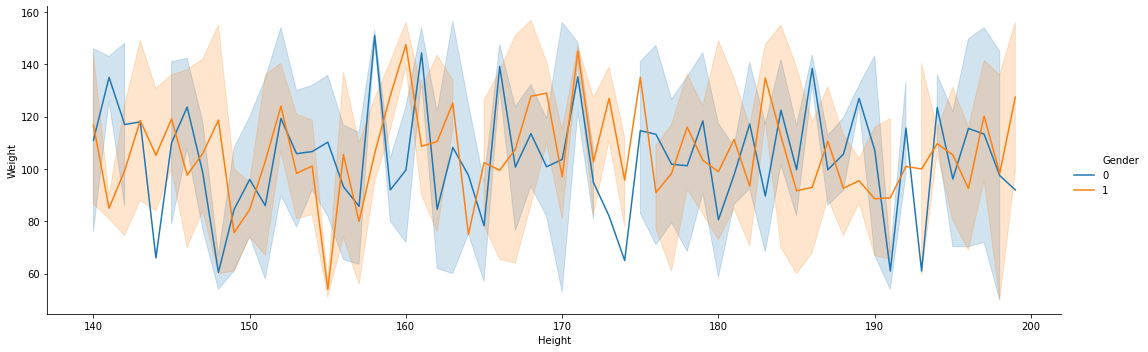

In [22]:
sns.relplot(x='Height',y='Weight',hue='Gender',data=data,kind='line',height=5,aspect=3)

In [30]:
x= data.drop('Index', axis=1)
y=data['Index']

In [28]:
x

,Gender,Height,Weight
Serial No,,,
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61
...,...,...,...
495,0,150,153
496,0,184,121
497,0,141,136


In [32]:
x_train ,x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state =0)

In [33]:
s=StandardScaler()
x_train =s.fit_transform(x_train)
x_test = s.transform(x_test)

In [34]:
clf=svm.SVC()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

In [35]:
print(classification_report(y_test,pred))

                      precision    recall  f1-score   support

extremely_overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly_overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(confusion_matrix(y_test,pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [40]:
print(accuracy_score(y_test,pred))

0.85


In [41]:
a=[[0,160,48]]
a=s.transform(a)
b=clf.predict(a)

In [42]:
b

array(['fit'], dtype=object)

In [43]:
data

,Gender,Height,Weight,Index
Serial No,,,,
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly_overweight
4,1,149,61,slightly_overweight
...,...,...,...,...
495,0,150,153,extremely_overweight
496,0,184,121,overweight
497,0,141,136,extremely_overweight
